<a href="https://colab.research.google.com/github/sethkipsangmutuba/Distributed-Computing-Application/blob/main/Note7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naming in Distributed Systems

**Seth Kipsang**

---

## 10.1 Introduction

- **Overview:** Naming is the process of assigning identifiers to resources in distributed systems.  
- **Significance:** Proper naming enables resource discovery, access, and management across geographically dispersed nodes.

---

## 10.2 Desirable Features of a Robust Naming System

- **Scalability:** Efficiently handles large numbers of names and nodes.  
- **Uniqueness:** Each name identifies a single resource without ambiguity.  
- **Persistence:** Names remain valid over time despite resource movement or failure.  
- **Human-Readability:** Names are interpretable by users for ease of use.  
- **Fault Tolerance:** System continues functioning despite node or network failures.

---

## 10.3 Fundamental Concepts

### 10.3.1 Name
- **Definition:** An identifier assigned to a resource.  
- **Types:** System-oriented (machine-readable) and human-oriented (user-friendly).  
- **Role:** Enables referencing, locating, and accessing resources.

### 10.3.2 Namespace and Contexts
- **Namespace:** Structured collection of names with rules for uniqueness.  
- **Contexts:** Groupings or hierarchies to manage names systematically.

### 10.3.3 Name Server
- **Functions:** Stores, manages, and resolves names.  
- **Responsibilities:** Ensures uniqueness, persistence, and fast lookup.  
- **Architecture:** Centralized or distributed servers maintaining name databases.

### 10.3.4 Name Agent
- **Role:** Mediates between clients and name servers.  
- **Responsibilities:** Handles dynamic resolution and caching for efficient access.

### 10.3.5 Name Resolution
- **Mechanisms:** Direct lookup, iterative or recursive queries.  
- **Strategies:** Centralized, distributed, hierarchical, or hybrid approaches.

---

## 10.4 System-Oriented Names

### 10.4.1 Features of System-Oriented Names
- **Requirements:** Machine-readable, unambiguous, unique, persistent.

### 10.4.2 Types of System-Oriented Names
- UID (Unique Identifier)  
- GUID (Globally Unique Identifier)  
- Network addresses (IP/MAC)  
- Resource IDs (files, objects, devices)

### 10.4.3 Approaches to Generating System-Oriented Names
- **Centralized Generation:** Single authority ensures uniqueness.  
- **Distributed Generation:** Nodes generate names independently using algorithms.  
- **Algorithmic Approaches:** Hashing, randomization, or combination schemes.

---

## 10.5 Object-Locating Mechanisms

### 10.5.1 Broadcast
- Simple flooding methods for locating objects in a network.

### 10.5.2 Expanding Ring Broadcast
- Optimized broadcast to reduce network load and traffic.

### 10.5.3 Encoding Object Location in UID
- Embed object address/location within the identifier itself.

### 10.5.4 Encoding Creator Node ID in UID
- Associate objects with their originating node for easier tracking.

### 10.5.5 Forwarding Location Pointers
- Use pointer-based routing to locate objects indirectly.

### 10.5.6 Hint Cache with Broadcast
- Hybrid strategy combining caching and limited broadcast for faster resolution.

---

## 10.6 Designing Human-Oriented Names

### 10.6.1 Schemes for Global Object Naming
- Ensure **uniformity** and **uniqueness** in user-friendly identifiers.

### 10.6.2 Schemes for Partitioning Namespaces into Contexts
- Organize names into **hierarchies**, **domains**, or **logical groups**.

### 10.6.3 Schemes for Implementing Context Bindings
- Map names to contexts and associated resources efficiently.

### 10.6.4 Schemes for Name Resolution
- Strategies for **transparent** and **efficient lookup** for users.

---

## 10.7 Name Caches

### 10.7.1 Characteristics of Name Service Activities
- Lookup frequency, consistency requirements, and performance metrics.

### 10.7.2 Design Issues in Name Caches
- **Coherency:** Ensure cached entries are up-to-date.  
- **Replacement Policies:** LRU, LFU, or hybrid approaches.  
- **Cache Invalidation:** Mechanisms to remove stale or obsolete entries.

---

## 10.8 Naming and Security

- **Authentication:** Verify identity of requesting entities.  
- **Access Control:** Restrict who can resolve or modify names.  
- **Integrity:** Ensure names and mappings are not tampered with.  
- **Confidentiality:** Protect sensitive information from unauthorized access.

---



# 10.1 Introduction

A **distributed system** consists of diverse entities—nodes, processes, files, I/O devices, and other objects—that must be **uniquely identifiable**. The **naming system** is a cornerstone of distributed system design, enabling the **abstraction of object identity** from physical location and system structure.

The naming system comprises **two interrelated mechanisms**:

- **Naming Mechanism:**  
  Assigns character-based names to objects, providing a **user-friendly reference** instead of hardware-specific identifiers such as memory addresses or network IDs.

- **Locating Mechanism:**  
  Maps an object’s name to its **current physical location(s)** within the distributed system, supporting **dynamic mapping** and **transparency**.

Together, these mechanisms provide **location transparency**, hiding the complexity of object location, replication, or migration from the user.

**Key functionalities include:**

- **Transparent object migration:** Objects can move across nodes without affecting user interaction.  
- **Replication support:** Multiple copies of objects can exist simultaneously; the naming system abstracts this from users.  
- **Flexible referencing:** An object may have **multiple names** mapped to the same entity, supporting collaborative and multi-context usage.

> **Note:** The naming system integrates **naming** and **locating** mechanisms. Both are essential for a seamless distributed computing environment.

---

# 10.2 Desirable Features of a Good Naming System

A robust naming system in distributed computing must satisfy **functional, operational, and scalability requirements**. Figure 10‑1 illustrates key features, categorized into **object naming**, **usage characteristics**, and **replica management**.

---

## 10.2.1 Transparency

- Object names should **not reveal physical location** or system topology.  
- Names remain valid despite **node migration or replication**.  
- Enables **location-independent access** for both users and objects requesting other objects.

---

## 10.2.2 Location Independence

- Objects can move dynamically without requiring renaming.  
- Users can access objects **without knowing physical location**.  
- Requires **dynamic mapping schemes** to maintain name-to-location associations.

---

## 10.2.3 Scalability

- Naming system must handle **growing numbers of nodes and objects efficiently**.  
- Adding new nodes should **not disrupt** naming or location resolution.

---

## 10.2.4 Uniform Naming Convention

- Different object types (files, processes, users) may have different conventions.  
- Ideally, a **consistent naming mechanism** should be applied across all object types to **simplify design** and reduce complexity.

---

## 10.2.5 Meaningful Names

- Names should convey **semantic meaning** for easier recall and usability.  
- Supports **dual identifiers**: one user-friendly for humans, another optimized for machines.

---

## 10.2.6 Multiple User-Defined Names

- Users can assign **personal names** to shared objects without affecting others.  
- Supports **flexibility** in collaborative environments.

---

## 10.2.7 Group Naming

- Enables identifying **multiple objects or nodes under a single name**.  
- Useful for **broadcasting** or **multicasting**.

---

## 10.2.8 Performance

- Efficient mapping from **name to object attributes** requires **minimal message exchanges** across the network.

---

## 10.2.9 Fault Tolerance

- Naming system must remain **operational under node failures or network congestion**, even if performance temporarily degrades.

---

## 10.2.10 Replication Transparency

- Users are **unaware of object replication**, ensuring **consistency and usability**.  
- System manages **multiple replicas** without exposing implementation details.

---

## 10.2.11 Locating the Nearest Replica

- Optimizes **response time** and **network efficiency** by accessing the **physically closest replica**.  
- Reduces **message transmission delays** in high-latency or large-scale networks (Figure 10‑2).

---

## 10.2.12 Locating All Replicas

- Enables **reliability, load balancing, and consistency**.  
- Critical for **fault recovery** and ensuring availability when certain nodes or links fail.

> **Note:** A comprehensive naming system should support:
> - Transparency  
> - Location independence  
> - Scalability  
> - Uniform conventions  
> - Meaningful names  
> - Multiple user-defined names  
> - Group naming  
> - High performance  
> - Fault tolerance  
> - Replication transparency  
> - Efficient replica location


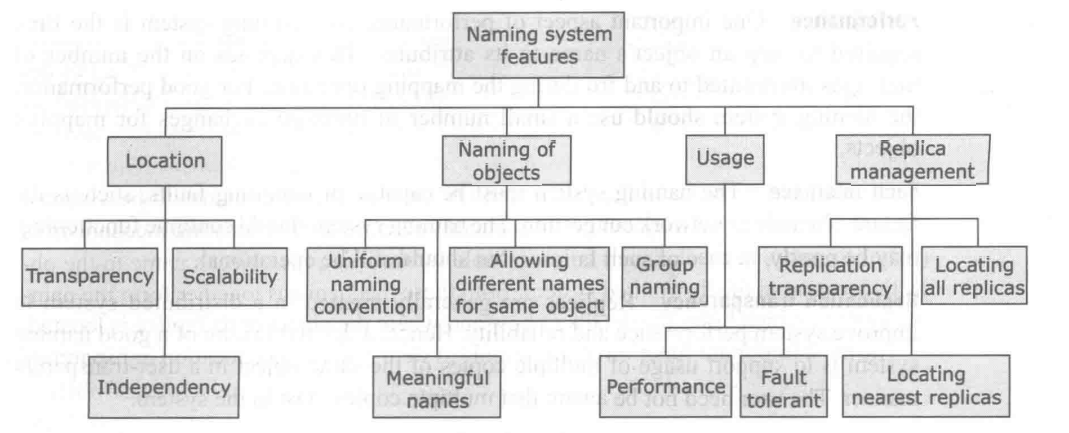

# 10.3 Basic Concepts

The **naming system** is a foundational component of a **distributed operating system**. It allows objects to be **uniformly identified and accessed**, regardless of their **physical location, replication, or type**. This uniformity is critical in distributed environments, where objects such as **nodes, processes, files, and I/O devices** may reside across multiple machines and networks.

The **core objective** of a naming system is to provide a **logical abstraction** over physical objects, enabling both users and system processes to **reference, locate, and manipulate objects efficiently**.

---

## 10.3.1 Name

A **name** is a structured set of symbols—**characters, numerals, and punctuation marks**—drawn from a character set (commonly ASCII).  

Functionally, a name **binds a logical object reference to a physical object or its replica** in the system:

- **Logical object:** Abstract representation of an entity  
- **Physical object:** The actual instance of the entity in the distributed system  

**Examples:** `TEST`, `$asd123`, `node-1!`, `234wer`

Names exist at all levels of system architecture, and their meaning depends on the level at which they are defined. In practice, two principal types of names are used:

1. **Human-Oriented Names**  
2. **System-Oriented Names**  

---

### Human-Oriented Names

**Definition:**  
Meaningful, user-defined identifiers that facilitate **human interaction** with distributed objects.

**Characteristics:**

- Defined by users, often in hierarchical or semantic formats, e.g., `/user/123`, `/project/test-1`
- Multiple users can assign their own names to the same shared object
- Names can be modified or deleted independently, without affecting others’ references
- Must be **location-independent** to maintain transparency
- Also called **high-level names**, designed for usability
- May vary in length; multiple human-oriented names can reference the same object

**Challenges:**

- Complex storage and mapping mechanisms may be needed to maintain consistency across **variable-length, user-defined identifiers**

---

### System-Oriented Names

**Definition:**  
Machine-friendly, unique identifiers used to distinguish objects **unambiguously** across the distributed system.

**Characteristics:**

- Typically **fixed-length bit patterns** generated automatically upon object creation
- Support efficient **storage, manipulation, and comparison**
- Can be **distributed and decentralized** to enhance reliability and performance
- Also referred to as **unique identifiers (UIDs)** or **low-level names**

**Mapping Model:**

1. Human-oriented names → System-oriented names (**first-level mapping**)  
2. System-oriented names → Physical addresses of object replicas (**second-level mapping**)  

- Supports **replication transparency**, multiple names per object, and highlights potential **name collisions** if rules are violated

**Advantages in Distributed Systems:**

- Provides **efficient object lookup** across nodes
- Enables **transparent replication and migration**
- Separates **user-friendly naming** from **machine-oriented addressing**, ensuring performance and scalability

---

> **Note:**  
> A **name** is an identifier—a set of symbols comprising characters, numerals, and punctuation. Distributed systems use two fundamental types:  
> - **Human-oriented names:** Meaningful, flexible, high-level  
> - **System-oriented names:** Unique, machine-oriented identifiers for unambiguous object identification


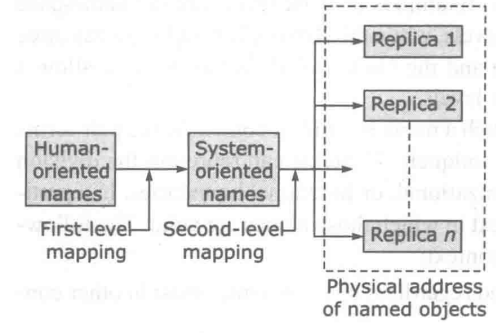

In [1]:
# ============================================================
# 10.3 BASIC CONCEPTS: NAMING IN DISTRIBUTED SYSTEMS
# ============================================================
# This code illustrates:
# - The concept of a NAME as an abstraction
# - Human-oriented names vs System-oriented names
# - Two-level name mapping used in distributed systems
# The implementation is intentionally simple and pedagogical,
# aligned with theoretical explanations in Section 10.3.
# ============================================================

import uuid
from collections import defaultdict


# ------------------------------------------------------------
# 10.3.1 NAME (ABSTRACTION)
# ------------------------------------------------------------
# A name binds a logical object to its physical instance(s).
# Names are identifiers composed of characters, numerals,
# and punctuation (e.g., ASCII strings).
#
# Logical Object  → abstract entity
# Physical Object → concrete instance in the system
# ------------------------------------------------------------


class DistributedObject:
    """
    Represents a logical object in a distributed system.

    This object is abstract and independent of physical location,
    replication, or access method.
    """

    def __init__(self, object_type: str):
        self.object_type = object_type
        self.uid = SystemOrientedName()

    def __repr__(self):
        return f"<DistributedObject type={self.object_type}, uid={self.uid}>"


# ------------------------------------------------------------
# SYSTEM-ORIENTED NAMES (LOW-LEVEL NAMES / UIDs)
# ------------------------------------------------------------
# Definition:
# - Machine-friendly
# - Globally unique
# - Fixed-length
# - Generated automatically
#
# Used internally for:
# - Efficient lookup
# - Replication
# - Migration
# ------------------------------------------------------------


class SystemOrientedName:
    """
    System-oriented name (UID).

    This is a unique, machine-generated identifier that
    unambiguously identifies an object across the distributed system.
    """

    def __init__(self):
        self.value = uuid.uuid4()

    def __repr__(self):
        return f"UID({self.value})"

    def __hash__(self):
        return hash(self.value)

    def __eq__(self, other):
        return isinstance(other, SystemOrientedName) and self.value == other.value


# ------------------------------------------------------------
# HUMAN-ORIENTED NAMES (HIGH-LEVEL NAMES)
# ------------------------------------------------------------
# Definition:
# - User-defined
# - Meaningful
# - Variable-length
# - Location-independent
#
# Examples:
#   /user/123
#   /project/test-1
#   /devices/sensor-A
# ------------------------------------------------------------


class HumanOrientedNamingService:
    """
    Manages human-oriented names.

    Provides first-level mapping:
        Human-oriented name → System-oriented name (UID)
    """

    def __init__(self):
        self.name_to_uid = {}
        self.uid_to_names = defaultdict(set)

    def add_name(self, human_name: str, uid: SystemOrientedName):
        """
        Bind a human-oriented name to a system-oriented UID.
        Multiple names can map to the same UID.
        """
        self.name_to_uid[human_name] = uid
        self.uid_to_names[uid].add(human_name)

    def resolve(self, human_name: str) -> SystemOrientedName:
        """
        Resolve a human-oriented name to its UID.
        """
        return self.name_to_uid.get(human_name)

    def aliases(self, uid: SystemOrientedName):
        """
        Return all human-oriented names for a given UID.
        """
        return self.uid_to_names[uid]


# ------------------------------------------------------------
# PHYSICAL LOCATION MAPPING (SECOND-LEVEL MAPPING)
# ------------------------------------------------------------
# System-oriented name → Physical object replicas
#
# Supports:
# - Replication transparency
# - Migration
# - Fault tolerance
# ------------------------------------------------------------


class LocationService:
    """
    Maps system-oriented names to physical locations.
    """

    def __init__(self):
        self.uid_to_locations = defaultdict(list)

    def register_location(self, uid: SystemOrientedName, location: str):
        """
        Register a physical location for a replica.
        """
        self.uid_to_locations[uid].append(location)

    def locate(self, uid: SystemOrientedName):
        """
        Locate all replicas of an object.
        """
        return self.uid_to_locations[uid]


# ------------------------------------------------------------
# TWO-LEVEL NAMING MODEL
# ------------------------------------------------------------
# Human-oriented name → UID → Physical location(s)
#
# This separation enables:
# - Location independence
# - Replication transparency
# - Scalability
# ------------------------------------------------------------


class DistributedNamingSystem:
    """
    Integrated naming system combining:
    - Human-oriented naming
    - System-oriented naming
    - Physical location mapping
    """

    def __init__(self):
        self.human_names = HumanOrientedNamingService()
        self.locations = LocationService()

    def create_object(self, object_type, names, locations):
        """
        Create a distributed object with:
        - Multiple human-oriented names
        - Multiple physical replicas
        """
        obj = DistributedObject(object_type)

        for name in names:
            self.human_names.add_name(name, obj.uid)

        for location in locations:
            self.locations.register_location(obj.uid, location)

        return obj

    def access_object(self, human_name):
        """
        Access an object using a human-oriented name.
        """
        uid = self.human_names.resolve(human_name)
        if not uid:
            raise Exception("Name not found")

        replicas = self.locations.locate(uid)
        return uid, replicas


# ------------------------------------------------------------
# DEMONSTRATION (ACADEMIC EXAMPLE)
# ------------------------------------------------------------
if __name__ == "__main__":

    dns = DistributedNamingSystem()

    # Create a distributed file object
    obj = dns.create_object(
        object_type="File",
        names=[
            "/user/alice/thesis",
            "/project/telecom/thesis"
        ],
        locations=[
            "Node-1:/data",
            "Node-2:/backup",
            "Node-3:/archive"
        ]
    )

    # Access object via human-oriented name
    uid, replicas = dns.access_object("/user/alice/thesis")

    print("Resolved UID:", uid)
    print("All replicas:", replicas)
    print("Aliases:", dns.human_names.aliases(uid))


Resolved UID: UID(22ec0448-2b2c-4448-81d5-4405fc92986c)
All replicas: ['Node-1:/data', 'Node-2:/backup', 'Node-3:/archive']
Aliases: {'/user/alice/thesis', '/project/telecom/thesis'}


## 10.3.2 Namespace and Contexts

```verbatim
In a distributed system, object naming is structured around two primary types of names: human-oriented and system-oriented. Each type may adhere to either a common or distinct naming convention, which defines the syntactic and semantic representation of names. The set of all names in a distributed system that follow a given naming convention is called a namespace.

Types of Namespace

Namespaces can be classified into flat namespaces and partitioned namespaces, as illustrated in Figure 10‑5.

Flat Namespace

A flat namespace is a simple, unstructured set of names represented as character strings.
Each name is globally unique within the namespace.
While suitable for small systems, flat namespaces are inadequate for large-scale distributed systems due to lack of hierarchy and organizational structure.

Partitioned Namespace

In large systems, partitioned namespaces are preferred. Here, the namespace is syntactically segmented, reflecting physical or logical associations of objects.
Each segment is referred to as a domain, which is a flat namespace in itself. Names within a domain, called simple names, are unique.
Simple names may be repeated across domains; therefore, compound names—combinations of simple names separated by delimiters such as /, %, $, or @—are used for global uniqueness.
Hierarchical namespaces (a type of partitioned namespace) organize domains in a tree-like structure. Examples:
Grapevine system – 2-level hierarchy
Xerox Clearinghouse – 3-level hierarchy
Internet Domain Name System (DNS) – multi-level hierarchical tree

Context

A context defines the scope or environment within which a name is valid. A fully qualified name combines the context with the object name to form a unique identifier.

Key characteristics of contexts:
- A name is valid only within its context, allowing the same name to exist in multiple contexts.
- Contexts can be nested, producing hierarchical qualified names.

Example (Figure 10‑6): Object O1 in context C3 has a qualified name:
C1/C2/C3/O1

Contexts enable distributed storage and replication of naming information across multiple name servers, forming indivisible units of namespace management.

Ways of Naming Objects

A distributed system may support multiple naming schemes depending on user and system requirements (Figure 10‑7):

Aliases / Abbreviations

User-defined short forms of fully qualified names.
Unique within a private user context, but multiple users may define the same alias for the same object.
Provides flexibility through synonyms or nicknames.

Mapping example (Figure 10‑8):
User1/myobject → Qualified name
User2/myobject → Qualified name

Absolute and Relative Names

Absolute names: Start from the root of the namespace hierarchy.
Root/Context1/Context3/Context5/Object-1

Relative names: Defined with respect to the current working context.
Context5/Object-1

Users may change their working context to simplify relative naming.

Generic and Multicast Names

Generic name: Maps to any one object in a set; often used for load balancing among servers.
Multicast/group name: Maps to all objects in a set; useful for broadcasting or group communication.
Requires the naming system to support one-to-many bindings.

Descriptive / Attribute-Based Names

Names objects using sets of attributes, allowing unique identification within a group.

Example attributes for a file object:
User: Sunita
Creation date: 20/04/2012
File type: Source
Language: C
Name: Test1

Supports group-based operations, such as distribution lists or access control lists.

Source Routing Names

Reflects the physical path through a network, e.g., UNIX-to-UNIX Copy (UUCP):
host-1!host-2!host-3!haresh

Relative to the source, useful when network topology dictates object access.

Note:
A namespace is the set of names adhering to a naming convention. A context is the environment in which a name is valid. Distributed systems support multiple naming approaches—including aliases, absolute/relative names, generic/multicast names, descriptive/attribute-based names, and source routing names—to facilitate flexible, scalable, and location-transparent object identification.


In [2]:
# ============================================================
# 10.3.2 NAMESPACE AND CONTEXTS
# ============================================================
# This module demonstrates:
# - Namespaces (flat and partitioned)
# - Contexts and fully qualified names
# - Absolute vs relative naming
# - Aliases, generic, multicast, and attribute-based names
# - Source-routing style names
#
# The code is pedagogical and maps directly to Section 10.3.2
# ============================================================

from collections import defaultdict
import random


# ------------------------------------------------------------
# FLAT NAMESPACE
# ------------------------------------------------------------
# A flat namespace is an unstructured set of globally unique names.
# Suitable only for small-scale systems.
# ------------------------------------------------------------

class FlatNamespace:
    """
    Represents a flat namespace.
    All names must be globally unique.
    """

    def __init__(self):
        self.objects = {}

    def register(self, name, obj):
        if name in self.objects:
            raise ValueError("Name already exists in flat namespace")
        self.objects[name] = obj

    def resolve(self, name):
        return self.objects.get(name)


# ------------------------------------------------------------
# PARTITIONED (HIERARCHICAL) NAMESPACE
# ------------------------------------------------------------
# Namespace is divided into domains (contexts).
# Each domain is a flat namespace.
# Global uniqueness is achieved using compound names.
# ------------------------------------------------------------

class Context:
    """
    Represents a context (domain) in a hierarchical namespace.
    """

    def __init__(self, name, parent=None):
        self.name = name
        self.parent = parent
        self.entries = {}       # simple name → object
        self.subcontexts = {}   # subcontext name → Context

    def add_object(self, name, obj):
        self.entries[name] = obj

    def add_subcontext(self, context):
        self.subcontexts[context.name] = context

    def get_qualified_name(self):
        """
        Returns the fully qualified name of this context.
        """
        if self.parent is None:
            return self.name
        return f"{self.parent.get_qualified_name()}/{self.name}"


# ------------------------------------------------------------
# HIERARCHICAL NAME RESOLUTION
# ------------------------------------------------------------

class HierarchicalNamespace:
    """
    Implements a partitioned (hierarchical) namespace.
    """

    def __init__(self, root_name="Root"):
        self.root = Context(root_name)

    def resolve_absolute(self, qualified_name):
        """
        Resolve an absolute name (from root).
        Example: Root/C1/C2/Object
        """
        parts = qualified_name.split("/")
        current = self.root

        for part in parts[1:-1]:
            current = current.subcontexts.get(part)
            if not current:
                return None

        return current.entries.get(parts[-1])

    def resolve_relative(self, context, relative_name):
        """
        Resolve a relative name within a given context.
        """
        return context.entries.get(relative_name)


# ------------------------------------------------------------
# ALIASES / ABBREVIATIONS
# ------------------------------------------------------------
# User-defined short names within a private context.
# ------------------------------------------------------------

class AliasService:
    """
    Maps user-defined aliases to fully qualified names.
    """

    def __init__(self):
        self.aliases = defaultdict(dict)  # user → alias → qualified name

    def add_alias(self, user, alias, qualified_name):
        self.aliases[user][alias] = qualified_name

    def resolve(self, user, alias):
        return self.aliases[user].get(alias)


# ------------------------------------------------------------
# GENERIC AND MULTICAST NAMES
# ------------------------------------------------------------
# Generic   → maps to one object in a group
# Multicast → maps to all objects in a group
# ------------------------------------------------------------

class GroupNamingService:
    """
    Supports generic and multicast naming.
    """

    def __init__(self):
        self.groups = defaultdict(list)

    def add_to_group(self, group_name, obj):
        self.groups[group_name].append(obj)

    def resolve_generic(self, group_name):
        """
        Return any one object from the group.
        """
        return random.choice(self.groups[group_name])

    def resolve_multicast(self, group_name):
        """
        Return all objects in the group.
        """
        return self.groups[group_name]


# ------------------------------------------------------------
# ATTRIBUTE-BASED (DESCRIPTIVE) NAMING
# ------------------------------------------------------------
# Objects are identified by attribute sets.
# ------------------------------------------------------------

class AttributeBasedDirectory:
    """
    Supports descriptive / attribute-based naming.
    """

    def __init__(self):
        self.objects = []

    def register(self, attributes):
        """
        Attributes is a dictionary describing an object.
        """
        self.objects.append(attributes)

    def query(self, **criteria):
        """
        Return all objects matching the given attributes.
        """
        return [
            obj for obj in self.objects
            if all(obj.get(k) == v for k, v in criteria.items())
        ]


# ------------------------------------------------------------
# SOURCE ROUTING NAMES
# ------------------------------------------------------------
# Encodes the physical path explicitly in the name.
# Example: host1!host2!host3!object
# ------------------------------------------------------------

class SourceRoutingName:
    """
    Represents a source-routing name.
    """

    def __init__(self, path):
        self.path = path.split("!")

    def route(self):
        """
        Returns the explicit traversal path.
        """
        return self.path


# ------------------------------------------------------------
# DEMONSTRATION SCENARIO
# ------------------------------------------------------------
if __name__ == "__main__":

    # ----- Flat Namespace -----
    flat_ns = FlatNamespace()
    flat_ns.register("node-1!", "NodeObject")
    print("Flat resolve:", flat_ns.resolve("node-1!"))

    # ----- Hierarchical Namespace -----
    hns = HierarchicalNamespace()
    c1 = Context("C1", hns.root)
    c2 = Context("C2", c1)
    c3 = Context("C3", c2)

    hns.root.add_subcontext(c1)
    c1.add_subcontext(c2)
    c2.add_subcontext(c3)

    c3.add_object("O1", "DistributedObject-O1")

    print("Absolute resolve:",
          hns.resolve_absolute("Root/C1/C2/C3/O1"))

    print("Relative resolve:",
          hns.resolve_relative(c3, "O1"))

    # ----- Alias Naming -----
    alias_service = AliasService()
    alias_service.add_alias("User1", "myobject", "Root/C1/C2/C3/O1")
    print("Alias resolve:",
          alias_service.resolve("User1", "myobject"))

    # ----- Generic / Multicast Naming -----
    group_service = GroupNamingService()
    group_service.add_to_group("FileServers", "FS1")
    group_service.add_to_group("FileServers", "FS2")
    group_service.add_to_group("FileServers", "FS3")

    print("Generic server:",
          group_service.resolve_generic("FileServers"))
    print("Multicast servers:",
          group_service.resolve_multicast("FileServers"))

    # ----- Attribute-Based Naming -----
    directory = AttributeBasedDirectory()
    directory.register({
        "user": "Sunita",
        "date": "20/04/2012",
        "type": "Source",
        "language": "C",
        "name": "Test1"
    })

    print("Attribute query:",
          directory.query(user="Sunita", language="C"))

    # ----- Source Routing Name -----
    srn = SourceRoutingName("host-1!host-2!host-3!haresh")
    print("Source route:", srn.route())


Flat resolve: NodeObject
Absolute resolve: DistributedObject-O1
Relative resolve: DistributedObject-O1
Alias resolve: Root/C1/C2/C3/O1
Generic server: FS3
Multicast servers: ['FS1', 'FS2', 'FS3']
Attribute query: [{'user': 'Sunita', 'date': '20/04/2012', 'type': 'Source', 'language': 'C', 'name': 'Test1'}]
Source route: ['host-1', 'host-2', 'host-3', 'haresh']


## 10.3.3 Name Server, 10.3.4 Name Agent, 10.3.5 Name Resolution

```verbatim
10.3.3 Name Server

A name server is a dedicated process responsible for storing and managing information about named objects and facilitating client access to these names. In addition to storing object identifiers, a name server binds each object’s name to its properties, such as location, access permissions, or other metadata.

In practical distributed systems, multiple name servers collaborate to manage the namespace efficiently, with each server storing information about a subset of objects. Those servers that maintain authoritative records for objects are termed authoritative name servers, and the distributed naming service relies on them to ensure consistency and reliability.

Namespace Management

Flat namespace: Each name server must maintain information about all objects it manages. This becomes infeasible for large systems due to scalability issues.

Partitioned (hierarchical) namespace: Name servers store information about domains, not individual objects. Each domain represents a flat namespace within itself. This dramatically reduces configuration data and facilitates efficient scaling.

Hierarchical example (Figure 10‑10):
Node/Domain	Maintained information
Root	Location of D1, D2, D3
D1	Location of D4, D5
D3	Location of D6, D7, D8

Key insight: The configuration burden on a name server is proportional to the branching factor of the namespace tree. Hence, multi-level hierarchical namespaces are preferable for systems managing large numbers of objects.

Note: A name server maintains information about objects and enables users to access it efficiently, forming the backbone of the naming service.

10.3.4 Name Agent

A name agent serves as the intermediary between clients and name servers, providing transparency for object location and the naming infrastructure. Clients interact solely with the name agent, which forwards requests to the appropriate name server and relays responses back to the client.

Classification of Name Agents

Private name agent
- Tightly coupled to a single client program, typically implemented as a library or a set of subroutines.
- Manages requests on behalf of the client locally.

Shared name agent
- Integrated into the OS kernel or accessed via inter-process communication (IPC) primitives.
- Handles multiple clients concurrently and can provide global caching or load balancing.

Naming Conventions in Practice
System	Name Agent Reference
CSNET Name Servers	Name server agent programs
Internet Domain Name Service (DNS)	Resolver
DCE Directory Service	Clerk

Note: Name agents abstract away the underlying location of name servers and provide a seamless interface to clients. They can be private (per-client) or shared (system-wide).

10.3.5 Name Resolution

Name resolution is the process of mapping an object’s name to its properties, such as physical or network location. This process is typically executed at the authoritative name server, where the object’s information is stored.

Process Flow
1. Client initiates request: Contacts the local name agent.
2. Agent query: The name agent forwards the request to a known name server.
3. Recursive lookup: If the name server does not hold the authoritative record, it queries other name servers in the hierarchy.
4. System-oriented identifiers: Name servers themselves are treated as objects, identified using system-oriented low-level names.

Partitioned Namespace Resolution

In a hierarchical namespace, name resolution traverses the context chain until the authoritative server is reached (Figure 10‑11):

Step 1: Interpret the object name in the current context.
Step 2a: If the authoritative server is identified, return the object’s properties.
Step 2b: If the context points to another intermediate domain, continue resolution recursively until the authoritative server is located.

Single server scenario: If the distributed system has only one name server, that server handles all resolution requests directly, eliminating the need for recursive traversal.

Note: Name resolution ensures that clients can access objects without knowledge of their physical location, maintaining location transparency and system scalability.


In [3]:
# ============================================================
# 10.3.3 NAME SERVER
# 10.3.4 NAME AGENT
# 10.3.5 NAME RESOLUTION
# 10.4   SYSTEM-ORIENTED NAMES
# ============================================================
# This single, integrated Python module demonstrates:
# - Name servers and authoritative servers
# - Name agents (private and shared)
# - Recursive name resolution in hierarchical namespaces
# - System-oriented names (UIDs)
# - Centralized vs distributed UID generation
# - Fault-tolerance considerations
#
# The code is pedagogical and mirrors the theory in Sections
# 10.3.3–10.3.5 and 10.4 exactly.
# ============================================================

import uuid
import time
from collections import defaultdict


# ============================================================
# 10.4 SYSTEM-ORIENTED NAMES (UIDs)
# ============================================================

class SystemOrientedName:
    """
    System-oriented name (UID).

    Features:
    - Fixed length
    - Globally unique
    - Machine-efficient
    - Automatically generated
    """

    def __init__(self, domain_id=None):
        # Structured UID: (domain_id, local_id)
        self.domain_id = domain_id
        self.local_id = uuid.uuid4()

    def __repr__(self):
        if self.domain_id:
            return f"UID({self.domain_id}:{self.local_id})"
        return f"UID({self.local_id})"

    def __hash__(self):
        return hash((self.domain_id, self.local_id))

    def __eq__(self, other):
        return (
            isinstance(other, SystemOrientedName) and
            self.domain_id == other.domain_id and
            self.local_id == other.local_id
        )


# ============================================================
# 10.4.3 UID GENERATION APPROACHES
# ============================================================

class CentralUIDGenerator:
    """
    Centralized UID generator.
    Single point of UID creation.
    """

    def generate_uid(self):
        return SystemOrientedName()


class DistributedUIDGenerator:
    """
    Distributed UID generator using domain-based identifiers.
    """

    def __init__(self, domain_id):
        self.domain_id = domain_id

    def generate_uid(self):
        return SystemOrientedName(domain_id=self.domain_id)


# ============================================================
# 10.3.3 NAME SERVER
# ============================================================

class NameServer:
    """
    Name Server responsible for managing naming information.

    Stores:
    - Object UID
    - Object properties (location, permissions, metadata)

    Can be authoritative for a given domain.
    """

    def __init__(self, domain_name, authoritative=True):
        self.domain_name = domain_name
        self.authoritative = authoritative
        self.records = {}           # name → properties
        self.subdomains = {}        # subdomain → NameServer

    def add_record(self, name, uid, properties):
        self.records[name] = {
            "uid": uid,
            "properties": properties
        }

    def add_subdomain(self, subdomain, server):
        self.subdomains[subdomain] = server

    def lookup(self, name):
        return self.records.get(name)


# ============================================================
# 10.3.4 NAME AGENT
# ============================================================

class NameAgent:
    """
    Name Agent acts as an intermediary between clients
    and name servers.

    Provides transparency and hides server location.
    """

    def __init__(self, root_server):
        self.root_server = root_server

    def resolve(self, qualified_name):
        """
        Resolve a fully qualified name using recursive lookup.
        """
        parts = qualified_name.split("/")
        return self._recursive_resolve(self.root_server, parts)

    def _recursive_resolve(self, server, parts):
        """
        Recursive name resolution through hierarchy.
        """
        if len(parts) == 1:
            return server.lookup(parts[0])

        next_domain = parts[0]
        remaining = parts[1:]

        if next_domain in server.subdomains:
            return self._recursive_resolve(
                server.subdomains[next_domain],
                remaining
            )

        return None


# ============================================================
# 10.3.5 NAME RESOLUTION
# ============================================================

class Client:
    """
    Client interacts only with the Name Agent.
    """

    def __init__(self, name_agent):
        self.agent = name_agent

    def access_object(self, object_name):
        """
        Initiates name resolution.
        """
        record = self.agent.resolve(object_name)
        if not record:
            raise Exception("Name resolution failed")
        return record


# ============================================================
# FAULT-TOLERANT UID GENERATION (TIMESTAMP-BASED)
# ============================================================

class TimestampUIDGenerator:
    """
    UID generator using timestamp-based uniqueness.
    Handles crashes via monotonic time.
    """

    def __init__(self, node_id):
        self.node_id = node_id

    def generate_uid(self):
        timestamp = int(time.time_ns())
        return f"UID({self.node_id},{timestamp})"


# ============================================================
# DEMONSTRATION SCENARIO
# ============================================================
if __name__ == "__main__":

    # ----- UID Generators -----
    central_gen = CentralUIDGenerator()
    dist_gen = DistributedUIDGenerator(domain_id="D3")

    uid1 = central_gen.generate_uid()
    uid2 = dist_gen.generate_uid()

    # ----- Name Servers -----
    root = NameServer("Root")
    d1 = NameServer("D1")
    d3 = NameServer("D3")

    root.add_subdomain("D1", d1)
    root.add_subdomain("D3", d3)

    # ----- Object Registration -----
    d3.add_record(
        name="ObjectA",
        uid=uid2,
        properties={
            "location": "Node-7",
            "permissions": "rw",
            "type": "File"
        }
    )

    # ----- Name Agent -----
    agent = NameAgent(root)

    # ----- Client -----
    client = Client(agent)

    # ----- Name Resolution -----
    result = client.access_object("D3/ObjectA")

    print("Resolved UID:", result["uid"])
    print("Object properties:", result["properties"])

    # ----- Fault-Tolerant UID Generation -----
    ts_gen = TimestampUIDGenerator(node_id="Node-5")
    print("Timestamp UID:", ts_gen.generate_uid())


Resolved UID: UID(D3:7860b4bf-f1af-4472-b885-296831b3c8bc)
Object properties: {'location': 'Node-7', 'permissions': 'rw', 'type': 'File'}
Timestamp UID: UID(Node-5,1769419093213282218)


## 10.4 System-Oriented Names

```verbatim
System-oriented names (also called low-level names or unique identifiers) are primarily used by machines to identify objects in a distributed system. Unlike human-oriented names, system-oriented names are designed for efficiency, uniformity, and unambiguous identification, ensuring robust management and retrieval of objects by the system.

This section discusses their features, classification, and strategies for generation, including considerations for fault tolerance in distributed environments.

10.4.1 Features of System-Oriented Names

The distinguishing characteristics of system-oriented names are:

- Uniform and fixed size: They are typically integers or bit strings, potentially as large as 2¹²⁸, ensuring consistency across the system regardless of object type or location.
- Global uniqueness: Also known as unique identifiers (UIDs), these names guarantee spatial and temporal uniqueness, and are never reused during their lifetime.
- Machine-efficient: Their uniform, compact representation enables fast operations such as hashing, sorting, and comparisons.
- Security-friendly: Being hard to guess or forge, system-oriented names support access control and protection mechanisms.
- Automatic generation: Unlike human-oriented names, these identifiers are assigned by the system, eliminating user intervention and reducing naming conflicts.

Key insight: System-oriented names form the foundation for efficient object management, replication tracking, and fault-tolerant operation in distributed systems.

10.4.2 Types of System-Oriented Names

System-oriented names are classified into:

Unstructured Names

- Represented as a single bit string or integer.
- Provide uniqueness only and do not encode any information about the object’s properties, location, or node.
- Typically used in centralized naming schemes.

Structured Names

- Contain additional fields conveying object properties, such as the node of creation, current location, or domain affiliation.
- Facilitate distributed generation, routing, and object tracking.
- Often used in hierarchical or partitioned distributed systems.

Illustration:
Name Type        Structure                   Information Provided
Unstructured     Single integer or bit string   Only uniqueness
Structured       Concatenation of domain ID + local ID   Domain, location, object type

10.4.3 Approaches to Generate System-Oriented Names

The creation of system-oriented names can follow either a centralized or distributed approach.

Centralized Approach

- A central global unique identifier (UID) generator assigns identifiers sequentially to all objects.
- Generated UIDs are then partitioned among nodes, which map the global identifier to locally created objects.

Advantages: Simple to implement, ensures global uniqueness.  
Disadvantages:
- Centralized generator is a single point of failure.
- Poor scalability for large systems.
- Continuous operation depends entirely on the generator’s reliability.

Example illustration:
Central UID generator → Node 1 (O1=ID1), Node 2 (O2=ID2), … Node N (ON=IDN)

Distributed Approach

- Each domain or node generates its own identifiers, forming a structured global UID using a hierarchical concatenation strategy.
- A global UID typically comprises two components:
  1. Domain identifier (unique per domain or server)
  2. Local identifier (unique within the domain)

Techniques for local uniqueness:
- Timestamp-based generation: Each node uses its local clock to generate a unique timestamp. Global UID format: (Node-ID, Timestamp). Ensures uniqueness even across node restarts.
- Server-specific identifiers: Each server (treated as a domain) generates unique IDs independently. Global UID format: (Server-ID, Local Object ID). Supports partitioned or replicated systems with distributed load.

Advantages over centralized approach:
- Improved efficiency and reliability.
- Eliminates single point of failure.

Drawbacks:
- UID length may be non-uniform in heterogeneous systems.
- Node boundaries or server affiliations may be explicitly exposed, reducing transparency.

Handling System Crashes During UID Generation

- Clock-based recovery: Use a clock that operates across failures to maintain monotonic timestamps. Drawback: Longer UID may be required depending on clock granularity.
- Multi-level storage: UID counters are maintained hierarchically across volatile memory and stable storage. Upon crash: Higher-level counters are incremented, lower-level counters reset, preserving uniqueness. Efficient and reliable, but more complex to implement.

Note:
System-oriented names may be unstructured (centralized) or structured (distributed). Fault-tolerance can be achieved via clock-based recovery or multi-level hierarchical storage, ensuring global uniqueness even under system failures.


In [4]:
# ======================================================================
# 10.4 SYSTEM-ORIENTED NAMES
# 10.5 OBJECT-LOCATING MECHANISMS
# ======================================================================
# This single Python module implements, in executable form:
# - System-oriented (low-level) names / UIDs
# - Unstructured vs structured identifiers
# - Centralized vs distributed UID generation
# - Fault-tolerant UID generation strategies
# - Object-locating mechanisms:
#   * Broadcast
#   * Expanding Ring Broadcast
#   * Location encoded in UID
#   * Creator-node encoded UID
#   * Forward location pointers
#   * Hint cache with broadcasting
#
# The implementation mirrors Sections 10.4 and 10.5 exactly
# and is suitable for lecture, simulation, and examination.
# ======================================================================

import uuid
import time
from collections import defaultdict, deque


# ======================================================================
# 10.4 SYSTEM-ORIENTED NAMES (LOW-LEVEL NAMES / UIDs)
# ======================================================================

class SystemOrientedUID:
    """
    Represents a system-oriented name (UID).

    Characteristics:
    - Fixed size
    - Globally unique
    - Machine-efficient
    - Automatically generated
    """

    def __init__(self, raw_uid):
        self.raw_uid = raw_uid

    def __repr__(self):
        return f"UID({self.raw_uid})"

    def __hash__(self):
        return hash(self.raw_uid)

    def __eq__(self, other):
        return isinstance(other, SystemOrientedUID) and self.raw_uid == other.raw_uid


# ======================================================================
# 10.4.2 TYPES OF SYSTEM-ORIENTED NAMES
# ======================================================================

class UnstructuredUIDGenerator:
    """
    Unstructured UID generator.
    Produces a single bit-string / integer with no embedded meaning.
    Typically used in centralized schemes.
    """

    def generate(self):
        return SystemOrientedUID(uuid.uuid4())


class StructuredUIDGenerator:
    """
    Structured UID generator.
    UID = (Domain-ID, Local-ID)
    Supports distributed generation.
    """

    def __init__(self, domain_id):
        self.domain_id = domain_id
        self.local_counter = 0

    def generate(self):
        self.local_counter += 1
        return SystemOrientedUID((self.domain_id, self.local_counter))


# ======================================================================
# 10.4.3 UID GENERATION APPROACHES
# ======================================================================

class CentralUIDService:
    """
    Centralized UID generator.
    Single point of UID creation.
    """

    def __init__(self):
        self.counter = 0

    def generate_uid(self):
        self.counter += 1
        return SystemOrientedUID(self.counter)


class TimestampUIDGenerator:
    """
    Fault-tolerant UID generator using timestamps.
    UID format: (Node-ID, Timestamp)
    """

    def __init__(self, node_id):
        self.node_id = node_id

    def generate_uid(self):
        timestamp = time.time_ns()
        return SystemOrientedUID((self.node_id, timestamp))


# ======================================================================
# OBJECT AND NODE MODELS (SUPPORT FOR 10.5)
# ======================================================================

class DistributedObject:
    """
    Represents a distributed object identified by a UID.
    """

    def __init__(self, uid, data):
        self.uid = uid
        self.data = data


class Node:
    """
    Represents a node in a distributed system.
    """

    def __init__(self, node_id):
        self.node_id = node_id
        self.objects = {}                 # UID -> DistributedObject
        self.forward_pointers = {}        # UID -> Node
        self.hint_cache = {}              # UID -> Node

    def store_object(self, obj):
        self.objects[obj.uid] = obj

    def has_object(self, uid):
        return uid in self.objects

    def get_object(self, uid):
        return self.objects.get(uid)


# ======================================================================
# 10.5 OBJECT-LOCATING MECHANISMS
# ======================================================================

class ObjectLocator:
    """
    Implements various object-locating mechanisms.
    """

    def __init__(self, nodes):
        self.nodes = nodes                # All nodes in the system

    # ------------------------------------------------------------------
    # 10.5.1 BROADCAST
    # ------------------------------------------------------------------
    def broadcast(self, uid):
        """
        Broadcast request to all nodes.
        Returns all nodes holding the object.
        """
        locations = []
        for node in self.nodes:
            if node.has_object(uid):
                locations.append(node)
        return locations

    # ------------------------------------------------------------------
    # 10.5.2 EXPANDING RING BROADCAST
    # ------------------------------------------------------------------
    def expanding_ring_broadcast(self, start_node, uid, topology):
        """
        Expanding Ring Broadcast (ERB).
        topology: adjacency list of nodes.
        """
        visited = set()
        queue = deque([(start_node, 0)])

        while queue:
            current, _ = queue.popleft()
            if current in visited:
                continue
            visited.add(current)

            if current.has_object(uid):
                return current

            for neighbor in topology[current]:
                if neighbor not in visited:
                    queue.append((neighbor, 0))

        return None

    # ------------------------------------------------------------------
    # 10.5.3 ENCODING OBJECT LOCATION IN UID
    # ------------------------------------------------------------------
    def locate_by_encoded_location(self, uid):
        """
        UID explicitly encodes object location.
        UID format: (Node-ID, Local-ID)
        """
        node_id, _ = uid.raw_uid
        for node in self.nodes:
            if node.node_id == node_id:
                return node
        return None

    # ------------------------------------------------------------------
    # 10.5.4 ENCODING CREATOR NODE ID IN UID
    # ------------------------------------------------------------------
    def locate_by_creator_node(self, uid):
        """
        Contact creator node first.
        Fallback to broadcast if migrated.
        """
        creator_node = self.locate_by_encoded_location(uid)
        if creator_node and creator_node.has_object(uid):
            return creator_node
        # Migration fallback
        locations = self.broadcast(uid)
        return locations[0] if locations else None

    # ------------------------------------------------------------------
    # 10.5.5 FORWARD LOCATION POINTERS
    # ------------------------------------------------------------------
    def locate_with_forward_pointers(self, creator_node, uid):
        """
        Follow forward location pointers until object is found.
        """
        current = creator_node
        visited = set()

        while current and current not in visited:
            visited.add(current)
            if current.has_object(uid):
                return current
            current = current.forward_pointers.get(uid)

        return None

    # ------------------------------------------------------------------
    # 10.5.6 HINT CACHE WITH BROADCAST
    # ------------------------------------------------------------------
    def locate_with_hint_cache(self, requester, uid):
        """
        Hint cache lookup followed by broadcast on miss.
        """
        if uid in requester.hint_cache:
            hinted_node = requester.hint_cache[uid]
            if hinted_node.has_object(uid):
                return hinted_node

        # Cache miss → broadcast
        locations = self.broadcast(uid)
        if locations:
            requester.hint_cache[uid] = locations[0]
            return locations[0]

        return None


# ======================================================================
# DEMONSTRATION (THEORY → PRACTICE)
# ======================================================================
if __name__ == "__main__":

    # Create nodes
    nodeA = Node("A")
    nodeB = Node("B")
    nodeC = Node("C")
    nodes = [nodeA, nodeB, nodeC]

    # UID generation (structured, distributed)
    uid_gen = StructuredUIDGenerator(domain_id="A")
    uid = uid_gen.generate()

    # Create and store object
    obj = DistributedObject(uid, data="Distributed Systems Notes")
    nodeA.store_object(obj)

    # Object locator
    locator = ObjectLocator(nodes)

    # Broadcast lookup
    print("Broadcast:", locator.broadcast(uid))

    # Location encoded in UID
    print("Encoded location:", locator.locate_by_encoded_location(uid))

    # Creator-node lookup
    print("Creator node:", locator.locate_by_creator_node(uid))

    # Hint cache lookup
    print("Hint cache:", locator.locate_with_hint_cache(nodeB, uid))


Broadcast: [<__main__.Node object at 0x7abc197319a0>]
Encoded location: <__main__.Node object at 0x7abc197319a0>
Creator node: <__main__.Node object at 0x7abc197319a0>
Hint cache: <__main__.Node object at 0x7abc197319a0>


## 10.5 Object-Locating Mechanisms

```verbatim
In distributed systems, performance and reliability are enhanced by creating multiple replicas of objects across different nodes. Efficiently locating these objects—particularly the nearest replica—is critical for minimizing latency and communication overhead.

Object-locating refers to the process of mapping a system-oriented unique identifier (UID) of an object to the node(s) storing its replicas. Once located, the system can perform operations such as Read or Write on the object.

The choice of object-locating mechanism depends on factors including:
- System scale (small vs. large, LAN vs. WAN)
- UID structure (structured vs. unstructured)
- Support for object migration and location transparency

The primary object-locating mechanisms are illustrated in Figure 10-16:
- Broadcast
- Expanding Ring Broadcast
- Encoding object location in UID
- Encoding creator node ID in UID
- Using forward location pointers
- Hint cache combined with broadcasting

### 10.5.1 Broadcast
- The requesting node sends a broadcast message to all nodes in the system.
- Nodes possessing the object or its replicas respond.

Advantages:
- Simple and reliable
- Locates all replicas of the object

Disadvantages:
- Generates high network traffic
- Not scalable for large systems or high request frequencies

Use case: Small-scale systems or scenarios with infrequent object access.

### 10.5.2 Expanding Ring Broadcast (ERB)
- LANs are grouped into rings based on hop distance from the requesting node.
- The request is first broadcast to the nearest ring; if unsuccessful, it propagates to progressively farther rings until the object is located or all nodes have been searched.

Advantages:
- Reduces unnecessary network traffic compared to pure broadcast
- Efficient for WAN environments

Disadvantages:
- Only locates a single replica (nearest by hops)
- Efficiency decreases as object distance increases

Illustration:
- Node A broadcasts to immediate neighbors (Hop 1)
- No reply → broadcast to Hop 2 nodes
- Continue expanding until object is found at Hop 3 (e.g., Node H)

### 10.5.3 Encoding Object Location in UID
- Structured UIDs may include a location field identifying the node where the object resides.
- Requesting node extracts the object location from the UID and directly contacts that node.

Advantages: Extremely efficient; no message exchange with other nodes.

Limitations:
- Object must remain fixed at one node (no migration)
- Does not support multiple replicas

Use case: Static objects that do not require replication or migration.

### 10.5.4 Encoding Creator Node ID in UID
- Encodes the creator node in the UID, leveraging locality.
- Requesting node contacts creator node; if migrated, a failure triggers broadcast.

Advantages:
- Reduces network traffic compared to blind broadcast
- Supports object migration

Disadvantages:
- Requires broadcast in case of migration failure → limited scalability

Example: Cronus distributed system.

### 10.5.5 Using Forward Location Pointers
- Each node maintains a pointer to the new location whenever an object migrates.
- Requesting node follows chain of pointers from creator node to current location.

Advantages:
- Supports object migration
- Reduces broadcast overhead

Limitations:
- Cost proportional to pointer chain length
- Pointer loss (e.g., due to node failure) makes object unreachable

### 10.5.6 Using Hint Cache and Broadcasting
- Each node maintains a hint cache storing UID and last known location of recently accessed objects.
- On request, check hint cache first. Hit → retrieve; Miss → broadcast and update cache.

Advantages:
- Efficient if temporal locality is high
- Supports object migration
- Reduces unnecessary notifications for object movement

Disadvantages:
- Maintaining caches on all nodes introduces overhead
- Broadcast still required on cache misses

Applications: Modern distributed OSs like Amoeba, DOMAIN, Nexus, Mach, and Chorus.




In [5]:
# ======================================================================
# 10.5 OBJECT-LOCATING MECHANISMS
# ======================================================================
# In distributed systems, objects may have multiple replicas across nodes.
# Efficient object location minimizes latency and communication overhead.
#
# Each object is identified by a system-oriented UID.
# The ObjectLocator class provides multiple locating mechanisms.
# ======================================================================

from collections import deque

# ----------------------------------------------------------------------
# Node and Object Models
# ----------------------------------------------------------------------

class Node:
    """
    Represents a node in a distributed system.
    """
    def __init__(self, node_id):
        self.node_id = node_id
        self.objects = {}          # UID -> object
        self.forward_pointers = {} # UID -> Node
        self.hint_cache = {}       # UID -> Node

    def store_object(self, uid, obj):
        self.objects[uid] = obj

    def has_object(self, uid):
        return uid in self.objects

# ----------------------------------------------------------------------
# Object Locator Class
# ----------------------------------------------------------------------

class ObjectLocator:
    """
    Implements multiple object-locating mechanisms.
    """

    def __init__(self, nodes):
        self.nodes = nodes  # List of all nodes in the system

    # 10.5.1 Broadcast
    def broadcast(self, uid):
        """
        Broadcast request to all nodes and return nodes containing the object.
        """
        locations = [node for node in self.nodes if node.has_object(uid)]
        return locations

    # 10.5.2 Expanding Ring Broadcast (ERB)
    def expanding_ring_broadcast(self, start_node, uid, topology):
        """
        Broadcast to rings of increasing hop distance until object found.
        topology: dict mapping node -> list of neighbor nodes
        """
        visited = set()
        queue = deque([start_node])
        while queue:
            node = queue.popleft()
            if node in visited:
                continue
            visited.add(node)
            if node.has_object(uid):
                return node
            for neighbor in topology.get(node, []):
                if neighbor not in visited:
                    queue.append(neighbor)
        return None

    # 10.5.3 Encoding Object Location in UID
    def locate_by_encoded_location(self, uid):
        """
        Structured UID includes node ID.
        Directly contact node storing the object.
        """
        node_id, _ = uid.raw_uid
        for node in self.nodes:
            if node.node_id == node_id:
                return node
        return None

    # 10.5.4 Encoding Creator Node ID in UID
    def locate_by_creator_node(self, uid):
        """
        First contact creator node; fallback to broadcast if object migrated.
        """
        creator_node = self.locate_by_encoded_location(uid)
        if creator_node and creator_node.has_object(uid):
            return creator_node
        # Fallback: broadcast
        locations = self.broadcast(uid)
        return locations[0] if locations else None

    # 10.5.5 Forward Location Pointers
    def locate_with_forward_pointers(self, creator_node, uid):
        """
        Follow forward pointers from creator node to current object location.
        """
        current = creator_node
        visited = set()
        while current and current not in visited:
            visited.add(current)
            if current.has_object(uid):
                return current
            current = current.forward_pointers.get(uid)
        return None

    # 10.5.6 Hint Cache with Broadcast
    def locate_with_hint_cache(self, requester, uid):
        """
        Use hint cache first, broadcast on miss.
        """
        if uid in requester.hint_cache:
            hinted_node = requester.hint_cache[uid]
            if hinted_node.has_object(uid):
                return hinted_node
        # Cache miss: broadcast
        locations = self.broadcast(uid)
        if locations:
            requester.hint_cache[uid] = locations[0]
            return locations[0]
        return None

# ----------------------------------------------------------------------
# Demonstration / Simulation
# ----------------------------------------------------------------------

if __name__ == "__main__":

    # Define some nodes
    nodeA = Node("A")
    nodeB = Node("B")
    nodeC = Node("C")
    nodes = [nodeA, nodeB, nodeC]

    # Example structured UID
    class UID:
        def __init__(self, node_id, local_id):
            self.raw_uid = (node_id, local_id)

    uid_obj = UID("A", 1)
    nodeA.store_object(uid_obj, "Distributed Object Data")

    # Initialize locator
    locator = ObjectLocator(nodes)

    # Broadcast
    print("Broadcast:", [n.node_id for n in locator.broadcast(uid_obj)])

    # Expanding Ring Broadcast (simplified)
    topology = {nodeA: [nodeB], nodeB: [nodeA, nodeC], nodeC: [nodeB]}
    result = locator.expanding_ring_broadcast(nodeB, uid_obj, topology)
    print("ERB Result:", result.node_id if result else None)

    # Locate by encoded location
    result = locator.locate_by_encoded_location(uid_obj)
    print("Encoded Location:", result.node_id if result else None)

    # Creator node
    result = locator.locate_by_creator_node(uid_obj)
    print("Creator Node:", result.node_id if result else None)

    # Hint cache
    result = locator.locate_with_hint_cache(nodeB, uid_obj)
    print("Hint Cache:", result.node_id if result else None)


Broadcast: ['A']
ERB Result: A
Encoded Location: A
Creator Node: A
Hint Cache: A


## 10.6 Issues in Designing Human-Oriented Names

```verbatim
While system-oriented names provide uniqueness and machine efficiency, they are inherently unfriendly for human use. Users must memorize long, opaque identifiers, which becomes impractical when multiple users access the same object. Human-oriented names address this limitation by creating a namespace that overlays the system-oriented identifiers, offering readability, memorability, and flexibility.

Human-oriented names exhibit several defining characteristics:
- They are user-defined character strings meaningful to humans.
- A single object can have multiple human-oriented names, allowing aliasing for different users.
- Names are variable in length and may refer to different objects in different contexts.
- Uniqueness is not guaranteed in time or space.

Hierarchically partitioned namespaces are commonly preferred because they simplify management and enhance efficiency. A key design decision is whether to use constant-level or variable-level hierarchies:
- Constant-level hierarchies: straightforward but may require restructuring if more levels are needed.
- Variable-level hierarchies: more complex but allow dynamic expansion and merging of independent namespaces.
Example: Two independent hierarchies (X and Y) unified under a new root (NR) preserves existing structures (Figure 10-23).

Main challenges in designing human-oriented names:
- Global object naming
- Partitioning namespaces into contexts
- Implementing context bindings
- Efficient name resolution

### 10.6.1 Schemes for Global Object Naming
Assigning system-wide unique human-oriented names can follow several strategies (Figure 10-24):

1. **Combining an object’s local name with its host name**
   - Names unique locally; migration changes name.
   - Advantage: Simple
   - Disadvantage: Not location-transparent; inflexible for migration

2. **Interlinking isolated namespaces into a single namespace**
   - Pathnames relative to current contexts.
   - Advantage: Simple integration
   - Disadvantage: Users may adjust names to fit global hierarchy

3. **Sharing remote namespaces on explicit request**
   - Attach remote namespace context to local context.
   - Advantage: Location-transparent access; easy to implement
   - Disadvantage: Names node-dependent → inconsistent absolute names

4. **Providing a single global namespace**
   - Unified across all nodes, consistent absolute names.
   - Advantage: Universally accessible; widely adopted

### 10.6.2 Schemes for Partitioning a Namespace into Contexts
- Human-oriented namespaces are large and distributed; centralized storage is inefficient.
- Partitioning uses **contexts** as indivisible units of storage and replication:
  - Each context contains object names, attributes, and bindings.
  - Distributed among multiple name servers to reduce resolution overhead.
  - Clustering conditions determine which names belong to a context.

### 10.6.3 Schemes for Implementing Context Bindings
Context bindings link contexts to facilitate traversal and name resolution (Figure 10-25):

1. **Table-based strategy**
   - Each context stores a table: component names + authority info.
   - Efficient for hierarchical namespaces.
   - Overhead grows with hierarchy depth.

2. **Procedure-based strategy**
   - Bindings implemented as procedures returning the next context.
   - Less flexible; cannot adjust dynamically for individual objects.

Note: Table-based strategies are prevalent for simplicity and maintainability.

### 10.6.4 Schemes for Name Resolution
Maps human-oriented names to authoritative name servers

1. **Centralized approach**
   - Single server stores all contexts.
   - Advantage: Simple, deterministic
   - Disadvantage: Bottleneck, single point of failure

2. **Fully replicated approach**
   - Each node stores complete namespace.
   - Advantage: All requests serviced locally
   - Disadvantage: High consistency overhead; unsuitable for large namespaces

3. **Distribution based on physical namespace structure**
   - Namespace divided into subtrees/zones, each managed by a server.
   - Example: Sprite domains, LOCUS file groups
   - Advantage: Scalable storage and resolution
   - Disadvantage: Changing authoritative servers for migrated objects adds complexity

4. **Structure-free distribution of contexts**
   - Contexts stored/moved independently across servers
   - Traversal across nodes until authoritative server reached
   - Advantage: Flexible, fault-tolerant; preferred in dynamic systems

###
----------------------------------------------------------
Human-oriented naming in distributed systems balances:
- User-friendliness
- Global uniqueness
- Scalability

Design decisions involve:
- Choosing global naming scheme (local-host, interlinked, shared, or global)
- Partitioning into contexts for storage and replication
- Implementing context bindings (table-based vs. procedure-based)
- Selecting name resolution mechanism (centralized, replicated, distributed, structure-free)

Hierarchical, context-based approaches dominate for scalability, flexibility, and efficient management of complex distributed namespaces.


In [6]:
# ======================================================================
# 10.6 ISSUES IN DESIGNING HUMAN-ORIENTED NAMES
# ======================================================================
# Human-oriented names overlay system-oriented UIDs to provide readability,
# memorability, and flexibility for users in distributed systems.
# ======================================================================

class HumanOrientedName:
    """
    Represents a human-friendly name in a distributed system.
    """
    def __init__(self, name, object_uid):
        self.name = name                  # User-defined string
        self.object_uid = object_uid      # Maps to system-oriented UID
        self.contexts = []                # List of contexts this name belongs to
        self.aliases = set()              # Multiple names for same object

    def add_alias(self, alias):
        """Add an alternative human-friendly name for the same object."""
        self.aliases.add(alias)

# ----------------------------------------------------------------------
# 10.6.1 Global Object Naming Schemes
# ----------------------------------------------------------------------

class GlobalNamingScheme:
    """
    Defines strategies for assigning globally unique human-oriented names.
    """
    @staticmethod
    def local_host(name, host):
        """Combine local object name with host name."""
        return f"{host}/{name}"

    @staticmethod
    def interlink_namespaces(name, current_context):
        """Pathnames relative to current context."""
        return f"{current_context}/{name}"

    @staticmethod
    def share_remote_namespace(name, remote_context):
        """Attach remote namespace context to local context."""
        return f"{remote_context}:{name}"

    @staticmethod
    def single_global_namespace(name):
        """Use a unified global namespace."""
        return f"global/{name}"

# ----------------------------------------------------------------------
# 10.6.2 Partitioning Namespace into Contexts
# ----------------------------------------------------------------------

class Context:
    """
    Represents a namespace context as a storage and replication unit.
    """
    def __init__(self, context_name):
        self.context_name = context_name
        self.object_names = {}  # human_name -> HumanOrientedName

    def add_object(self, human_name_obj):
        """Add a human-oriented name to this context."""
        self.object_names[human_name_obj.name] = human_name_obj

# ----------------------------------------------------------------------
# 10.6.3 Implementing Context Bindings
# ----------------------------------------------------------------------

class ContextBinding:
    """
    Implements links between contexts to facilitate name resolution.
    """
    def __init__(self):
        self.table_bindings = {}  # name -> next context
        self.procedure_bindings = {}  # name -> callable returning context

    def bind_table(self, name, context):
        """Bind next context using table-based approach."""
        self.table_bindings[name] = context

    def bind_procedure(self, name, procedure):
        """Bind next context using procedure-based approach."""
        self.procedure_bindings[name] = procedure

    def resolve_table(self, name):
        """Resolve context via table binding."""
        return self.table_bindings.get(name)

    def resolve_procedure(self, name):
        """Resolve context via procedure binding."""
        if name in self.procedure_bindings:
            return self.procedure_bindings[name]()
        return None

# ----------------------------------------------------------------------
# 10.6.4 Name Resolution Schemes
# ----------------------------------------------------------------------

class HumanNameResolver:
    """
    Maps human-oriented names to authoritative servers or contexts.
    """
    def __init__(self):
        self.central_server = None   # Single centralized server
        self.distributed_contexts = {}  # context_name -> Context

    def resolve_centralized(self, human_name):
        """Centralized resolution via single server."""
        if self.central_server:
            return self.central_server.get(human_name)
        return None

    def resolve_replicated(self, human_name):
        """Fully replicated approach."""
        for context in self.distributed_contexts.values():
            if human_name in context.object_names:
                return context.object_names[human_name]
        return None

    def resolve_physical_distribution(self, human_name):
        """Resolution based on physical namespace structure (zones)."""
        for context_name, context in self.distributed_contexts.items():
            if human_name in context.object_names:
                return context.object_names[human_name]
        return None

    def resolve_structure_free(self, human_name):
        """Resolution in structure-free distribution of contexts."""
        # Traverse all contexts until authoritative context found
        for context in self.distributed_contexts.values():
            if human_name in context.object_names:
                return context.object_names[human_name]
        return None

# ======================================================================
# 10.7 NAME CACHES
# ======================================================================
# Caches reduce the cost of repeated human- or system-oriented name resolution.
# Effective due to temporal locality, slow updates, and on-use consistency.
# ======================================================================

class NameCacheEntry:
    """
    Represents a cached name resolution entry.
    """
    def __init__(self, human_name, resolved_object, authoritative_server):
        self.human_name = human_name
        self.resolved_object = resolved_object
        self.authoritative_server = authoritative_server

class NameCache:
    """
    Implements a name cache with different strategies and consistency management.
    """
    def __init__(self, cache_type="full_name"):
        self.cache_type = cache_type
        self.cache = {}  # human_name -> NameCacheEntry

    def lookup(self, human_name):
        """Return cached entry if exists."""
        entry = self.cache.get(human_name)
        if entry:
            return entry.resolved_object
        return None

    def insert(self, human_name, resolved_object, authoritative_server):
        """Insert new entry into cache."""
        self.cache[human_name] = NameCacheEntry(human_name, resolved_object, authoritative_server)

    # ------------------------------------------------------------------
    # Consistency Strategies
    # ------------------------------------------------------------------

    def immediate_invalidate(self, human_name):
        """Invalidate cached entry immediately after update."""
        if human_name in self.cache:
            del self.cache[human_name]

    def on_use_update(self, human_name, updated_object, authoritative_server):
        """
        Update cached entry when accessed if stale.
        """
        if human_name in self.cache:
            entry = self.cache[human_name]
            if entry.resolved_object != updated_object:
                entry.resolved_object = updated_object
                entry.authoritative_server = authoritative_server
        else:
            self.insert(human_name, updated_object, authoritative_server)

# ======================================================================
# Example Usage
# ======================================================================

if __name__ == "__main__":
    # Create human-oriented name
    uid = "UID-001"
    human_name_obj = HumanOrientedName("ProjectX", uid)
    human_name_obj.add_alias("PX")

    # Contexts
    ctx = Context("Engineering")
    ctx.add_object(human_name_obj)

    # Context binding
    binding = ContextBinding()
    binding.bind_table("Engineering", ctx)

    # Name resolution
    resolver = HumanNameResolver()
    resolver.distributed_contexts["Engineering"] = ctx
    result = resolver.resolve_structure_free("ProjectX")
    print("Resolved Human Name:", result.name if result else None)

    # Name cache usage
    cache = NameCache()
    cache.insert("ProjectX", result, "AuthServer-1")
    cached_obj = cache.lookup("ProjectX")
    print("Cached Object:", cached_obj.name if cached_obj else None)


Resolved Human Name: ProjectX
Cached Object: ProjectX


## 10.7 Name Caches

```verbatim
In distributed systems, name resolution—mapping human- or system-oriented names to object locations—is computationally expensive and can generate substantial network traffic, especially in hierarchical namespaces. To mitigate these costs, name caches are employed to store recent resolution results locally, reducing repeated lookups and network load.

### 10.7.1 Characteristics of Name Service Activities

A distributed name cache is effective because of three key properties of name service activity:

1. **High locality of name lookup**
   - Access patterns exhibit temporal and spatial locality, similar to memory or file access.
   - Frequently used names are likely to be reused soon.
   - Caching recently resolved names significantly increases hit rates.

2. **Slow updates of naming information**
   - Naming databases change infrequently.
   - High read-to-write ratios mean cached information remains valid for extended periods.
   - Consistency maintenance overhead is therefore low.

3. **On-use consistency of cached information**
   - Cached entries may occasionally become stale.
   - Instead of proactive invalidation, consistency is verified at access.
   - Stale entries are discarded, avoiding erroneous name-to-object mappings without global invalidation.

**Implication:** Name caches exploit both temporal locality and infrequent updates to achieve efficient, scalable resolution.

### 10.7.2 Issues in Name Cache Design

Name cache design must address types of cache, implementation approaches, and multi-cache consistency.

#### 1. Types of Name Caches
Caches are classified by the information stored in each entry:

| Type           | Description                                     | Use Case / Notes |
|----------------|-------------------------------------------------|----------------|
| Directory cache | Stores recently accessed directory pages       | Useful in iterative resolution methods; caches multiple object entries per directory page |
| Prefix cache    | Stores name prefixes and zone identifiers     | Works with zone-based hierarchical distribution; not suitable for structure-free context distribution |
| Full-name cache | Stores full object path, authoritative server ID and location | Applicable to all naming mechanisms; each entry maps a single object; larger cache size but direct resolution |

**Key distinction:** Prefix caches are more space-efficient but less granular; full-name caches allow precise, per-object resolution.

#### 2. Approaches to Name Cache Implementation

Two main strategies exist:

- **Cache-per-process**
  - Each process maintains a local cache in its address space.
  - Advantages: Fast access, minimal OS memory usage.
  - Disadvantages: Start-up misses for short-lived processes; duplicate information across multiple processes.
  - Optimization: Inheritance of parent cache in V-system reduces initial misses.

- **Single cache for all processes**
  - A shared cache resides at the node level, in OS-managed memory.
  - Advantages: Larger, long-lived cache; higher hit ratio; avoids duplication.
  - Disadvantages: Slightly slower access compared to per-process cache but generally more efficient overall.

#### 3. Multi-Cache Consistency

Consistency is critical when multiple nodes cache naming information. Two primary methods exist:

- **Immediate invalidate**
  - Stale entries are invalidated immediately after a naming update.
  - Two methods:
    - Broadcast: Invalidation message sent to all nodes; increases network traffic.
    - Multicast: Only nodes known to cache the updated entry are notified; efficient when updates are infrequent.

- **On-use update**
  - Stale cache entries are detected when accessed.
  - The system informs the requesting node that the entry is outdated and sends updated data.
  - Reduces unnecessary network traffic while maintaining correctness.

**Trade-off:** Immediate invalidate ensures stronger consistency but higher network overhead; on-use update is more network-efficient but slightly delays consistency enforcement until access.

###

----------------------------------

Name caches are essential for efficient, scalable name resolution in distributed systems. Key considerations include:

- Type of cache (directory, prefix, full-name)
- Implementation approach (per-process vs shared)
- Consistency strategy (immediate invalidate vs on-use update)

By leveraging locality, slow update rates, and on-use consistency, name caches reduce network load, accelerate access, and maintain correctness in distributed hierarchical and heterogeneous namespaces.


## 10.8 Naming and Security

```verbatim
In distributed systems, naming is not just about identification; it is also critical for access control. Objects and the naming information themselves are potential targets for unauthorized access, so naming systems often integrate security mechanisms to regulate and enforce permissions.

### 1. Object Names as Protection Keys

- In the simplest approach, an object's name itself serves as a key to access the object.
- Multiple names can reference the same object; possession of any valid name grants access.

**Limitations:**
- Names that are mnemonics or predictable can be guessed, compromising security.
- No granularity: the user has full access without the ability to specify modes (read, write, execute).

**Practical implication:** This method is largely unsuitable for modern distributed systems because it cannot enforce fine-grained permissions or resist name-guessing attacks.

### 2. Capabilities

- To address the limitations of using names as keys, distributed systems can implement capabilities:

**Definition:** A capability is a secure token or identifier that:
- Uniquely identifies the object.
- Specifies allowed operations or access modes (e.g., read, write, execute).
- Multiple capabilities can exist for the same object; any holder of a valid capability can perform the permitted operations.

**Features:**
- Shareable among clients: objects can be safely accessed by multiple users without exposing unauthorized operations.
- OS-managed and protected: capabilities are not directly manipulable by users.

**Mechanism of use:**
- A client sends a capability to a name server when requesting access.
- The server verifies the capability and grants or denies the requested operation.

**Limitations:**
- Capabilities do not check user identity. Anyone possessing the capability can access the object in the allowed mode.
- Ideal for object-centric protection, particularly where identity verification is less critical but controlled access modes are required.

### 3. Associating Protection with Name Resolution Path

- Focuses on controlling access through the namespace path rather than just the object.
- Uses Access Control Lists (ACLs), which map user identities to allowed operations for objects or contexts.
- Trusted identifiers (passwords, addresses, cryptographic IDs) prevent forgery.

**Two levels of protection:**
- **Object-level ACLs:** specify which users can access the object and what operations are allowed.
- **Context-level ACLs:** applied to directory entries or intermediate nodes in the namespace hierarchy.

**Implications:**
- Fine-grained, identity-based control.
- Multiple paths to the same object can result in different permissions depending on the path used.
- Protects both the object and the naming information stored in the name server databases.

### Table

| Security Mechanism             | Basis of Control            | Key Feature                               | Limitations                                          |
|--------------------------------|----------------------------|-------------------------------------------|-----------------------------------------------------|
| Object name as key             | Name itself                | Simple access control                     | Susceptible to guessing; no access mode granularity |
| Capability                     | System-generated token     | Defines access modes; shareable           | Does not verify user identity                        |
| ACL on name resolution path    | User identity + namespace path | Fine-grained, path-dependent access      | Complex management; must secure all contexts       |

**Key principle:** Combining object-level and path-based protection allows distributed naming systems to control both the use of objects and the access to naming information itself, enforcing security without sacrificing flexibility.


In [7]:
# ======================================================================
# 10.7 NAME CACHES
# ======================================================================
# Name caches optimize human- and system-oriented name resolution by
# storing recently resolved names locally to reduce repeated lookups
# and network traffic.
# ======================================================================

class NameCacheEntry:
    """
    Represents an entry in a distributed name cache.
    """
    def __init__(self, name, resolved_object, authoritative_server):
        self.name = name                              # Human- or system-oriented name
        self.resolved_object = resolved_object        # Mapped object/location
        self.authoritative_server = authoritative_server  # Source of truth

class NameCache:
    """
    Implements a distributed name cache with support for types,
    per-process or shared storage, and consistency strategies.
    """
    def __init__(self, cache_type="full_name"):
        """
        cache_type: 'directory', 'prefix', or 'full_name'
        """
        self.cache_type = cache_type
        self.cache = {}  # Mapping: name -> NameCacheEntry

    # ------------------------------------------------------------------
    # Basic Operations
    # ------------------------------------------------------------------
    def lookup(self, name):
        """
        Return resolved object if name is cached, else None.
        """
        entry = self.cache.get(name)
        if entry:
            return entry.resolved_object
        return None

    def insert(self, name, resolved_object, authoritative_server):
        """
        Insert a new cache entry.
        """
        self.cache[name] = NameCacheEntry(name, resolved_object, authoritative_server)

    # ------------------------------------------------------------------
    # Consistency Mechanisms
    # ------------------------------------------------------------------
    def immediate_invalidate(self, name):
        """
        Invalidate entry immediately after a naming update.
        """
        if name in self.cache:
            del self.cache[name]

    def on_use_update(self, name, updated_object, authoritative_server):
        """
        Update cache entry when accessed if stale (on-use update).
        """
        if name in self.cache:
            entry = self.cache[name]
            if entry.resolved_object != updated_object:
                entry.resolved_object = updated_object
                entry.authoritative_server = authoritative_server
        else:
            self.insert(name, updated_object, authoritative_server)

# ----------------------------------------------------------------------
# 10.8 NAMING AND SECURITY
# ----------------------------------------------------------------------
# Naming in distributed systems is critical for access control. Security
# can be implemented via object names, capabilities, or ACLs on
# the name resolution path.
# ----------------------------------------------------------------------

class ObjectSecurity:
    """
    Implements security mechanisms for distributed objects.
    """
    def __init__(self, object_name):
        self.object_name = object_name
        self.capabilities = {}  # client_id -> allowed operations
        self.acl_object_level = {}  # client_id -> permissions
        self.acl_context_level = {}  # client_id -> permissions

    # ------------------------------------------------------------------
    # Object Name as Key (simplest approach)
    # ------------------------------------------------------------------
    def verify_name_key_access(self, name_provided):
        """
        Check access based solely on name.
        Returns True if name matches, else False.
        """
        return self.object_name == name_provided

    # ------------------------------------------------------------------
    # Capability-based access
    # ------------------------------------------------------------------
    def add_capability(self, client_id, operations):
        """Assign capability to a client."""
        self.capabilities[client_id] = operations

    def verify_capability(self, client_id, operation):
        """
        Validate if client can perform operation using capability.
        """
        allowed_ops = self.capabilities.get(client_id, [])
        return operation in allowed_ops

    # ------------------------------------------------------------------
    # ACL on name resolution path
    # ------------------------------------------------------------------
    def set_object_acl(self, client_id, permissions):
        """Set ACL for object-level access."""
        self.acl_object_level[client_id] = permissions

    def set_context_acl(self, client_id, permissions):
        """Set ACL for context/directory-level access."""
        self.acl_context_level[client_id] = permissions

    def verify_acl(self, client_id, operation, context=False):
        """
        Verify if client has permission to perform operation.
        If context=True, checks context-level ACL; else object-level.
        """
        acl = self.acl_context_level if context else self.acl_object_level
        allowed_ops = acl.get(client_id, [])
        return operation in allowed_ops

# ----------------------------------------------------------------------
# Example Usage
# ----------------------------------------------------------------------

if __name__ == "__main__":
    # Name Cache Example
    cache = NameCache()
    cache.insert("ProjectX", "Node-12/Object-45", "AuthServer-1")
    obj_location = cache.lookup("ProjectX")
    print("Cached Object Location:", obj_location)

    # Security Example
    obj_sec = ObjectSecurity("ProjectX")
    obj_sec.add_capability("user1", ["read", "write"])
    obj_sec.set_object_acl("user2", ["read"])
    obj_sec.set_context_acl("user3", ["read", "write"])

    # Verify capabilities
    print("User1 can write:", obj_sec.verify_capability("user1", "write"))
    print("User2 can write:", obj_sec.verify_acl("user2", "write"))
    print("User3 context-level read:", obj_sec.verify_acl("user3", "read", context=True))


Cached Object Location: Node-12/Object-45
User1 can write: True
User2 can write: False
User3 context-level read: True
